In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
from sklearn.datasets import make_blobs

In [62]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=42)

In [63]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]], shape=(1000, 2))

In [64]:
y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

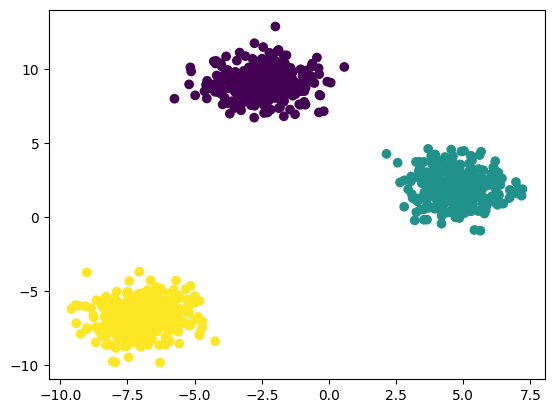

In [65]:
plt.scatter(X[:,0], X[:,1], c=y)

In [66]:
## Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.cluster import KMeans

In [70]:
## Elbow method To select the k value
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [71]:
wcss

[1340.0,
 424.7795042841271,
 43.537817283488835,
 36.755326197789756,
 30.940038308444805,
 28.529853153395564,
 23.428595054568547,
 21.475988380706585,
 19.455483512927863,
 17.41760988422314]

Text(0.5, 1.0, 'Elbow Method')

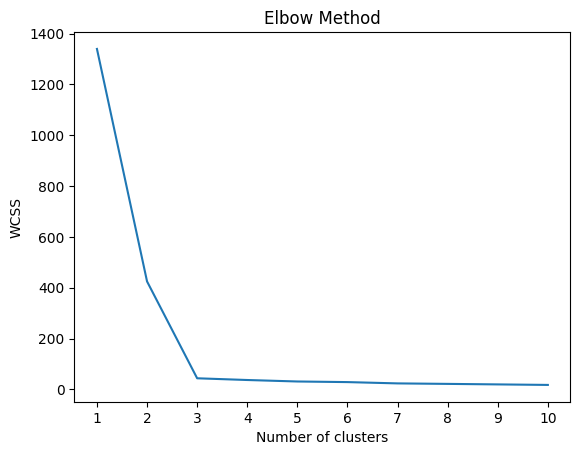

In [73]:
## Plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

## 3 is the optimal number of clusters

In [76]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit_predict(X_train_scaled)

array([0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0,
       0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0,
       2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 2,
       0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2,

In [77]:
y_pred = kmeans.predict(X_test_scaled)

In [78]:
y_pred

array([2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0,
       2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0,
       0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 0,
       2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0,
       1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0,
       2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1,

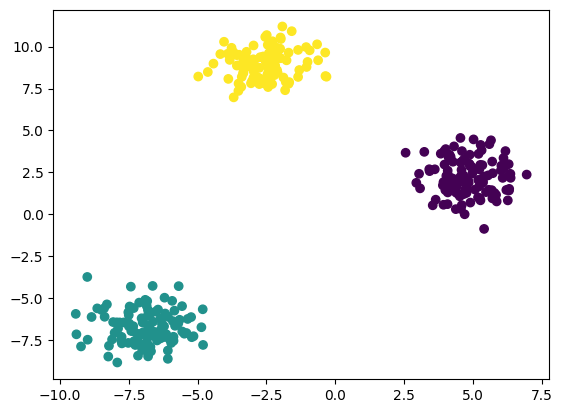

In [79]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

In [81]:
## Validating the k-value
## knee-locator
## silhouette score

In [82]:
## kneelocator
from kneed import KneeLocator

In [83]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [84]:
kl.elbow

np.int64(3)

In [86]:
## Silhouette score
from sklearn.metrics import silhouette_score

In [87]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [88]:
silhouette_coefficients

[np.float64(0.6857199772837788),
 np.float64(0.842476016737992),
 np.float64(0.6770256265785449),
 np.float64(0.5091364707155758),
 np.float64(0.49577014240920925),
 np.float64(0.34769388949030977),
 np.float64(0.3334267331478637),
 np.float64(0.34437682899398475),
 np.float64(0.32970706088305324)]

Text(0, 0.5, 'Silhouette Coefficient')

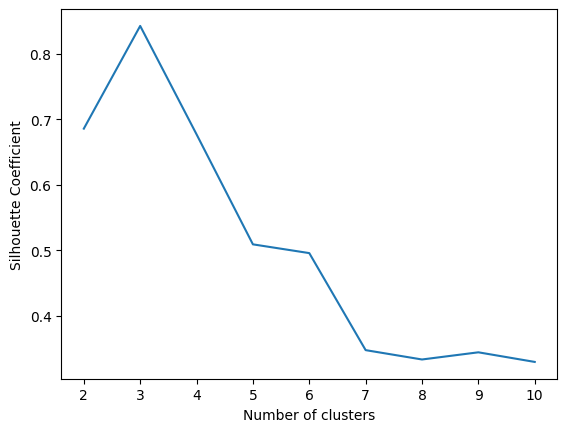

In [89]:
## Plot silhouette score
plt.plot(range(2,11), silhouette_coefficients)

## 3 is the optimal number of clusters
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')

plt.ylabel('Silhouette Coefficient')